# Find me at 1AU

## When was the earth at exactly 1 AU last year? 

The following notebook outlines a basic approximation method for finding when the earth was at 1AU during the 2015 calendar year. 

Data can be retrieved from: http://ssd.jpl.nasa.gov/horizons.cgi#results

Packages used:
SciPy
Pandas
NumPy


Astronomy is a science filled with interesting units.
Lightyears commonly confuses laymen as a  measure of time, one may get a bulk measurement in solar masses, and the astronimcal unit (AU) is defined as the mean distance between the sun and earth. At ~150 million kilometers the AU is most commonly used to measure distances within the solar system and is a fundamental component in the definition for parsec. Given that the earth oscillates in and out of being at this point, I sought to ask the question, when in 2015 was the earth at exactly 1AU? 

In [20]:
import numpy as np
import pandas as pd


distance = [9.819782626349840E-01, 9.827647797470883E-01, 9.875926934230993E-01, 9.959863983068189E-01, 
            1.004981025828292E+00, 1.012740708942766E+00, 1.016946290048821E+00, 1.016882632672933E+00,
            1.012430455496035E+00, 1.005037363367403E+00, 9.961784988904274E-01, 9.886521473883428E-01]


distance = [x - 1 for x in distance] 
month = range(1, len(distance)+1)

data_table = pd.DataFrame({'Distance from coordinate centre':distance, 'Month':month})
difference_table = pd.DataFrame({'Distance from 1AU':distance, 'Month':month})

print(data_table) # prints data
print(difference_table) # prints data with 1 subtracted from all va's



    Distance from coordinate centre  Month
0                         -0.018022      1
1                         -0.017235      2
2                         -0.012407      3
3                         -0.004014      4
4                          0.004981      5
5                          0.012741      6
6                          0.016946      7
7                          0.016883      8
8                          0.012430      9
9                          0.005037     10
10                        -0.003822     11
11                        -0.011348     12
    Distance from 1AU  Month
0           -0.018022      1
1           -0.017235      2
2           -0.012407      3
3           -0.004014      4
4            0.004981      5
5            0.012741      6
6            0.016946      7
7            0.016883      8
8            0.012430      9
9            0.005037     10
10          -0.003822     11
11          -0.011348     12


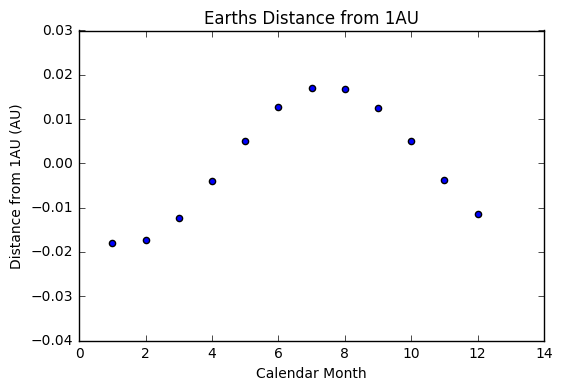

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline 

ax = plt.subplot()

x, y = month, distance 

plt.xlabel('Calendar Month')
plt.ylabel('Distance from 1AU (AU)')
plt.title('Earths Distance from 1AU')
plt.scatter(x, y)

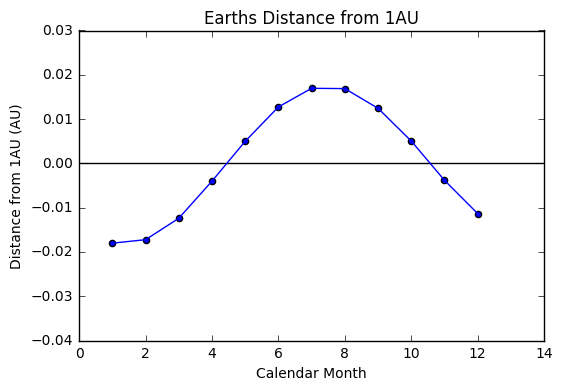

In [22]:
from scipy import interpolate 

# create the interpolation 
tck = interpolate.splrep(x, y, s=0, k=3)

ynew = interpolate.splev(x, tck)

plt.axhline(0, color='black')
plt.scatter(x, y)
plt.plot(x, ynew)
plt.xlabel('Calendar Month')
plt.ylabel('Distance from 1AU (AU)')
plt.title('Earths Distance from 1AU')




In [23]:
# interpolation and derivative 

def f(x, interpolation):
    ynew = interpolate.splev(x, interpolation)
    return ynew

def df(x, interpolation, der=1):
    yder = interpolate.splev(x, interpolation, der=der)
    return yder

# function for newtons method
def get_root(x, f):
    while abs(0 - f(x, tck)) > 1.11e-16:
        xn = x - f(x, tck)/df(x, tck)
        x = xn
    return x


In [24]:
print 'The roots found using newtons method and initial guesses 4, and 10 are:'
print(get_root(4,f))
print(get_root(10, f))

print 'The roots found using the SciPy sproot function are:'
print(interpolate.sproot(tck))

The roots found using newtons method and initial guesses 4, and 10 are:
4.44089770096
10.5711443027
The roots found using the SciPy sproot function are:
[  4.4408977  10.5711443]


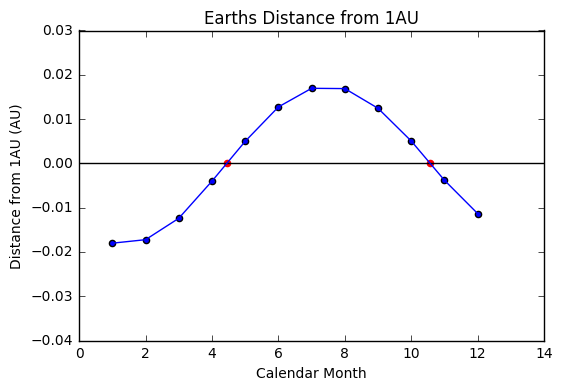

In [25]:
# plotting final results 

plt.axhline(0, color='black')
plt.scatter(x, y)
y_root = [0,0]
x_root = [4.44089770096, 10.5711443027]
plt.scatter(x_root, y_root, color='r')
plt.plot(x, ynew)
plt.xlabel('Calendar Month')
plt.ylabel('Distance from 1AU (AU)')
plt.title('Earths Distance from 1AU')
plt.savefig('Earth Distance From 1AU')


As we can see, the earth was at exactly 1AU around the middle of April 
and the middle of October. 